# Categorizing Partner Status: Data Cleaning
This dataset was taken from the European Social Survey. The goal of this project will be to use gradient boosting and predict whether a person will be living with a partner given various social characteristics of that person.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy_utils import create_database, database_exists
import warnings
warnings.filterwarnings('ignore')

import helpers as hp
from config import usr, pwd, url, port, db, table

%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv(("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv"))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 873.0+ KB


In [4]:
df_clean = df.copy()

## Data Cleaning
### Missing values

In [5]:
hp.find_na_columns(df_clean, display_fractions=True)

Variables with missing values and their fraction of missing values:
tvtot      0.000931
ppltrst    0.001629
pplfair    0.004538
pplhlp     0.002909
happy      0.003607
sclmeet    0.001745
sclact     0.010938
gndr       0.001164
agea       0.027810
partner    0.001978
dtype: float64


**Observations:** There are very few missing values in this dataset, less than 3% for all variables.

Let's look at the distributions for each variable that has missing values.

In [6]:
na_fractions = hp.find_na_columns(df_clean)
na_columns = na_fractions.index.tolist()

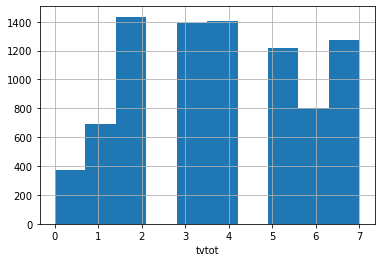

Median: 4.0 [tvtot]


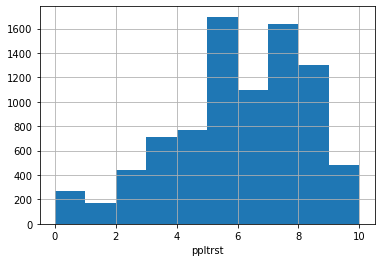

Median: 6.0 [ppltrst]


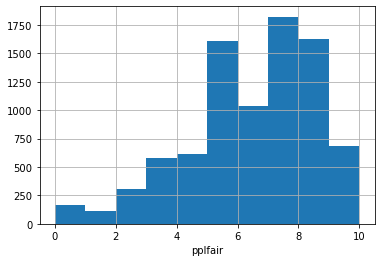

Median: 6.0 [pplfair]


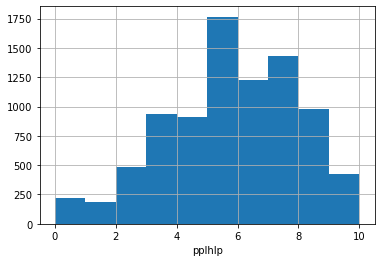

Median: 5.0 [pplhlp]


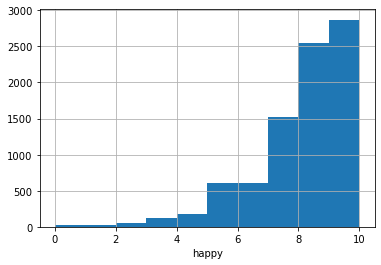

Median: 8.0 [happy]


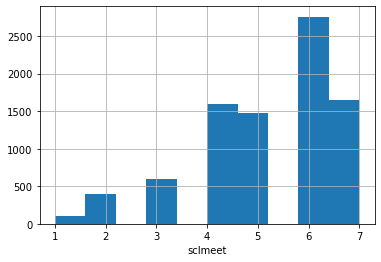

Median: 6.0 [sclmeet]


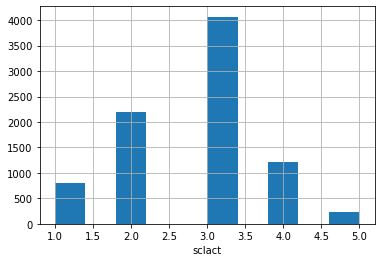

Median: 3.0 [sclact]


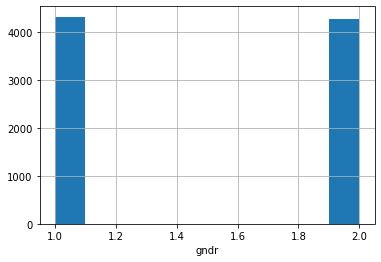

Median: 1.0 [gndr]


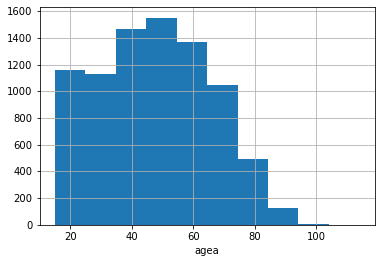

Median: 47.0 [agea]


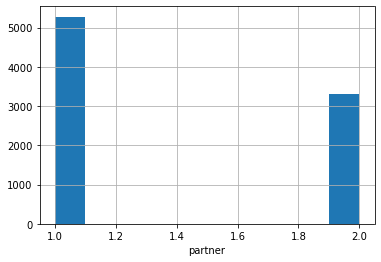

Median: 1.0 [partner]


In [7]:
for column in na_columns:
    df_clean[column].hist(bins=10)
    plt.xlabel(column)
    plt.show()
    print(f'Median: {df_clean[column].median()} [{column}]')

**Observations:** The distributions for most of the variables with missing values appears skewed. I will fill the missing values for these columns using the median value for that variable.

In [8]:
fill_values = {}
for column in na_columns:
    fill_values[column] = df_clean[column].median()

In [9]:
df_clean.fillna(value=fill_values, inplace=True)

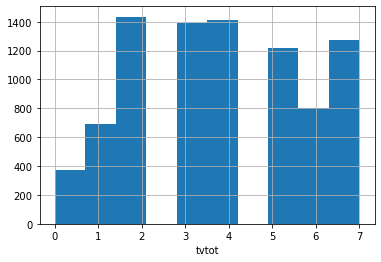

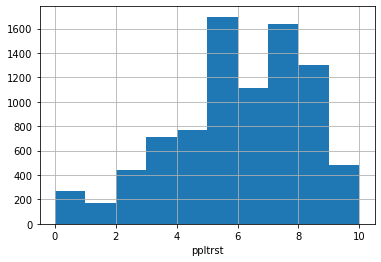

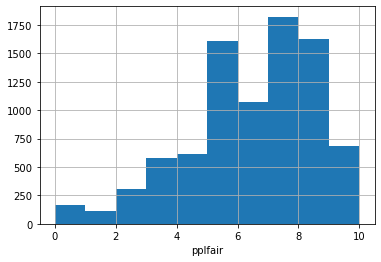

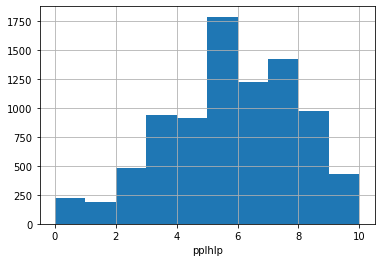

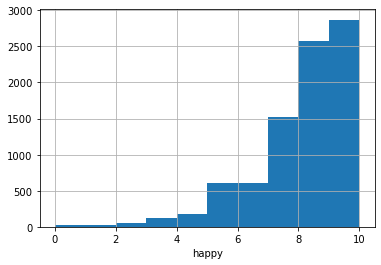

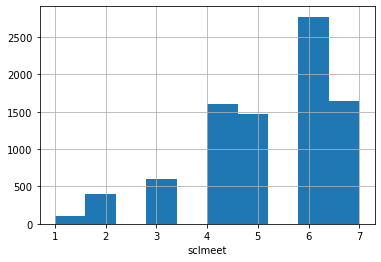

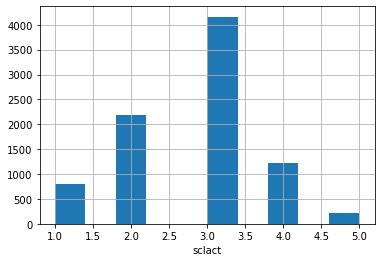

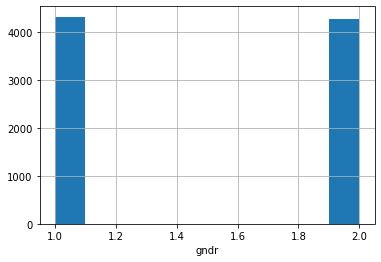

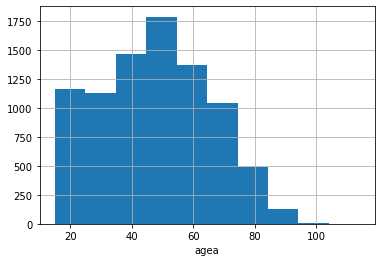

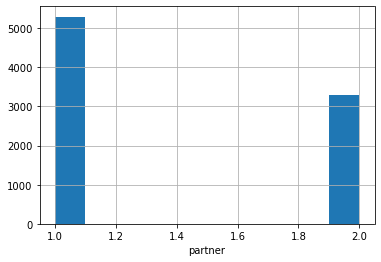

In [10]:
for column in na_columns:
    df_clean[column].hist(bins=10)
    plt.xlabel(column)
    plt.show()

In [12]:
hp.find_na_columns(df_clean, display_fractions=True)

Variables with missing values and their fraction of missing values:
Series([], dtype: float64)


The missing values have now been filled. The dataset is clean and I can save it to a SQL database.

## Save Dataset
Save cleaned dataset to a SQL database.

In [13]:
# Create the database if it doesn't exist
db_url = f"postgresql+psycopg2://{usr}:{pwd}@{url}:{port}/{db}"
if database_exists(db_url):
    pass
else:
    create_database(db_url)

In [14]:
engine = create_engine(f"postgresql+psycopg2://{usr}:{pwd}@{url}:{port}/{db}")

In [15]:
df_clean.to_sql(name=table, con=engine, index=False, if_exists='replace')

In [16]:
engine.dispose()